In [1]:
import pandas as pd
import numpy as np

C:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset=pd.read_csv("Placement.csv")

In [3]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


# 1)Replace the NaN values with the correct value. And justify why you have chosen the same.

In [4]:
dataset.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [5]:
# Find the Quantitative & Qualitative columns 

In [6]:
qual=[]
quan=[]
for columnName in dataset.columns:
    print(columnName)
    if(dataset[columnName].dtypes=="O"):
        print("qual")
    else:
        print("quan")

sl_no
quan
gender
qual
ssc_p
quan
ssc_b
qual
hsc_p
quan
hsc_b
qual
hsc_s
qual
degree_p
quan
degree_t
qual
workex
qual
etest_p
quan
specialisation
qual
mba_p
quan
status
qual
salary
quan


In [7]:
qual

[]

In [8]:
quan

[]

In [9]:
#Seperation of qual & quan with dataset append

In [10]:
def qualQuan(dataset):
    qual=[]
    quan=[]
    for columnName in dataset.columns:        
        if(dataset[columnName].dtypes=='O'):
            qual.append(columnName)
        else:
            quan.append(columnName)
    return qual,quan

In [11]:
qual,quan=qualQuan(dataset)

In [12]:
qual

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [13]:
quan

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [14]:
# Find Outliers

In [15]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser",
                                   "Greater","Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
    descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\

In [16]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1,62.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2:50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3:75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
99%,212.86,87.0,91.86,83.86,97.0,76.1142,NaN
Q4:100%,215.0,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0


In [17]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [18]:
lesser

['hsc_p']

In [19]:
greater

['hsc_p', 'degree_p', 'salary']

In [20]:
# Replacing Outliers

In [21]:
for columnName in lesser:
    dataset[columnName][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in greater:
    dataset[columnName][dataset[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\716799018.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  dataset[columnName][dataset[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
C:\Users\Vergeena

In [22]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1,62.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2:50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3:75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
99%,212.86,87.0,91.86,83.86,97.0,76.1142,NaN
Q4:100%,215.0,89.4,97.7,91.0,98.0,77.89,940000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0


In [23]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1:25%","Q2:50%","Q3:75%","99%","Q4:100%","IQR","1.5rule","Lesser",
                                   "Greater","Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["Mean"]=dataset[columnName].mean()
    descriptive[columnName]["Median"]=dataset[columnName].median()
    descriptive[columnName]["Mode"]=dataset[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=dataset.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=dataset.describe()[columnName]["75%"]
    descriptive[columnName]["99%"]=np.percentile(dataset[columnName],99)
    descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=dataset[columnName].min()
    descriptive[columnName]["Max"]=dataset[columnName].max()

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Mean"]=dataset[columnName].mean()
C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py:8: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Q2:50%"]=dataset.describe()[columnName]["50%"]
C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py:12: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
C:\Users\Vergeena\AppData

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1076706800.py:11: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["Q4:100%"]=dataset.describe()[columnName]["max"]
C:\Users\Vergeena\AppData\Local\Temp\ipykernel_2979

In [24]:
descriptive

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
Mean,108.0,67.303395,66.334744,66.358558,72.100558,62.278186,277648.648649
Median,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Mode,1,62.0,63.0,65.0,60.0,56.7,300000.0
Q1:25%,54.5,60.6,60.9,61.0,60.0,57.945,240000.0
Q2:50%,108.0,67.0,65.0,66.0,71.0,62.0,265000.0
Q3:75%,161.5,75.7,73.0,72.0,83.5,66.255,300000.0
99%,212.86,87.0,91.129,83.86,97.0,76.1142,NaN
Q4:100%,215.0,89.4,91.15,88.5,98.0,77.89,390000.0
IQR,107.0,15.1,12.1,11.0,23.5,8.31,60000.0
1.5rule,160.5,22.65,18.15,16.5,35.25,12.465,90000.0


In [25]:
lesser=[]
greater=[]
for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [26]:
lesser

[]

In [27]:
greater

[]

In [28]:
# Find the Nan or null values with count

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [30]:
# Replace the nan or null values based on problem statement

In [31]:
dataset["salary"].fillna(0)

0      270000.0
1      200000.0
2      250000.0
3           0.0
4      390000.0
         ...   
210    390000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

In [32]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,390000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [33]:
# 0 replaced and inplace the 0

In [34]:
dataset["salary"].fillna(0,inplace=True)

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\2080798296.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["salary"].fillna(0,inplace=True)


In [35]:
dataset

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,390000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [36]:
df = pd.DataFrame(dataset)

In [37]:
df.to_csv('Pre_placement1.csv', index=False)

# 2) How many of them are not placed?

In [38]:
dataset["status"].value_counts()

status
Placed        148
Not Placed     67
Name: count, dtype: int64

# 3) Find the reason for non placement from the dataset?

In [39]:
df=pd.DataFrame(dataset)

In [40]:
# Filter the data for the student who is not placed
not_placed_student = df[df['status'] == 'Not Placed'].iloc[0]

# Print the details of the not placed student
print("Details of the not placed student:")
print(not_placed_student)

# Reasons for not being placed
reasons = []

if not_placed_student['hsc_p'] < 60:
    reasons.append("Low HSC percentage")
if not_placed_student['degree_p'] < 60:
    reasons.append("Low degree percentage")
if not_placed_student['workex']:
    reasons.append("No work experience")
if not_placed_student['etest_p'] < 70:
    reasons.append("Low E-test percentage")
if not_placed_student['specialisation'] != 'Mkt&Fin':
    reasons.append("Specialization mismatch")

print("\nReasons for not being placed:")
for reason in reasons:
    print(reason)

Details of the not placed student:
sl_no                      4
gender                     M
ssc_p                   56.0
ssc_b                Central
hsc_p                   52.0
hsc_b                Central
hsc_s                Science
degree_p                52.0
degree_t            Sci&Tech
workex                    No
etest_p                 66.0
specialisation        Mkt&HR
mba_p                  59.43
status            Not Placed
salary                   0.0
Name: 3, dtype: object

Reasons for not being placed:
Low HSC percentage
Low degree percentage
No work experience
Low E-test percentage
Specialization mismatch


# 4) What kind of relation between salary and mba_p

In [41]:
dataset.corr(numeric_only=True)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
sl_no,1.000000,-0.078155,-0.090500,-0.091039,0.063636,0.022327,-0.019367
ssc_p,-0.078155,1.000000,0.513478,0.538686,0.261993,0.388478,0.605710
hsc_p,-0.090500,0.513478,1.000000,0.434606,0.240775,0.348452,0.486374
degree_p,-0.091039,0.538686,0.434606,1.000000,0.227147,0.402376,0.464159
etest_p,0.063636,0.261993,0.240775,0.227147,1.000000,0.218055,0.191970
mba_p,0.022327,0.388478,0.348452,0.402376,0.218055,1.000000,0.134084
salary,-0.019367,0.605710,0.486374,0.464159,0.191970,0.134084,1.000000


In [42]:
#The correlation of mba_p with salary is 13.4% ,because salary in vast variation values compared to mba_p mark 
#Relation between two columns(mba_p and Salary)
 #MBA / Salary
 #0.134 it is possitive correlation,its around 13.4% salary hike with the mark of MBA(1.00) 100%

# 5) Which specialization is getting a minimum salary?

In [43]:
min_salary_specialization = df.loc[df['salary'].idxmin()]['specialisation']
print("Specialization with the minimum salary:", min_salary_specialization)

Specialization with the minimum salary: Mkt&HR


In [44]:
#Mkt & HR specialization is getting a minimum salary.

# 6) How many of them are getting above 500,000 salaries?

In [45]:
above_5L = df[df['salary'] > 500000].shape[0]
print("salary of students above 500,000:", above_5L)

salary of students above 500,000: 0


In [46]:
df=dataset['salary']
df.max()

390000.0

In [47]:
# Nobody getting the salary above 5,00,000 because the Maximum salary is 3,90,000 .
#In preprocessed data no one getting the 500000 above because ouliers removed from the dataset.

# 7) Test the Analysis of Variance between etest_p and mba_p at significance level 5%.(Make decisions using Hypothesis Testing).

In [48]:
dataset.drop('sl_no',inplace=True,axis=1)

In [49]:
dataset

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,390000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,390000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [50]:
#ANAVO - two way(Because Analysis of Variance b/w 2 columns)

In [51]:
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [52]:
model = ols(f'{"salary"} ~ {"etest_p"} + {"mba_p"} + {"etest_p"}:{"mba_p"}', data=dataset).fit()
Twoway=sm.stats.anova_lm(model,type=2)
Twoway

,df,sum_sq,mean_sq,F,PR(>F)
etest_p,1.0,1.469777e+11,1.469777e+11,8.240442,0.004514
mba_p,1.0,3.561430e+10,3.561430e+10,1.996749,0.159110
etest_p:mba_p,1.0,4.224406e+10,4.224406e+10,2.368453,0.125308
Residual,211.0,3.763426e+12,1.783614e+10,NaN,NaN


In [53]:
# etest_p is approximately 0.004,(Con:pvalue<0.05 is reject null hypothesis)condtion found true.
#So,null hypothesis is rejected,Alernate is accept.
#H0 - etest_p has a statistically significant effect
#H1 - etest_p has a statistically no significant effect.

#mba_p is approximately 0.159,(Con:pvalue<0.05 is reject null hypothesis),condtion found false.
#So,Null hypothesis is accept, Alternate hypothesis is rejected.
#H0 - mba_p has a statistically no significant effect 
#H1 - mba_p has a statistically significant effect.

# etest_p:mba_p is approximately 0.125,(Con:pvalue<0.05 is reject null hypothesis)condtion found false.
#So,Null hypothesis is accept, Alternate hypothesis is rejected. 
#H0 - etest_p:mba_p has a statistically no significant effect on the outcome being studied
#H1 - etest_p:mba_p has a statistically significant effect on the outcome being studied.

# 8) Test the similarity between the degree_t(Sci &Tech) and specialization(Mkt & HR) with respect to salary at a significance level of 5%.(Make decisions using Hypothesis Testing).

In [54]:
from scipy.stats import ttest_ind
dataset=dataset.dropna()
Sci_Tech=dataset[dataset["degree_t"]=='Sci&Tech']["salary"]
Mkt_HR=dataset[dataset["specialisation"]=='Mkt&HR']["salary"]
ttest_ind(Sci_Tech,Mkt_HR)

TtestResult(statistic=2.3852430796563096, pvalue=0.018299948650088643, df=152.0)

In [55]:
#It is unpaired T-Test-Differnt groups but same condition
#The Pvalue is 0.018(Con:pvalue<0.05 is reject null hypothesis),condition found is true.
#So,reject null hypothesis,accept Alternate hypothesis
#H0 -  has a similarity.
#H1 -  has a no similarity.
#The similarity between degree_t[Sci&Tech] & specialisation[Mkt&HR] with salary is 1%

# 9) Convert the normal distribution to standard normal distribution for the salary column.

In [56]:
def stdNdist(dataset):
    #to convert std normal distribution
    import seaborn as sns
    mean=dataset.mean()
    std=dataset.std()
    values=[i for i in dataset]
    z_score=[((j-mean)/std)for j in values]
    sns.distplot(z_score,kde=True)
    return dataset

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\1068173790.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


0      270000.0
1      200000.0
2      250000.0
3           0.0
4      390000.0
         ...   
210    390000.0
211    275000.0
212    295000.0
213    204000.0
214         0.0
Name: salary, Length: 215, dtype: float64

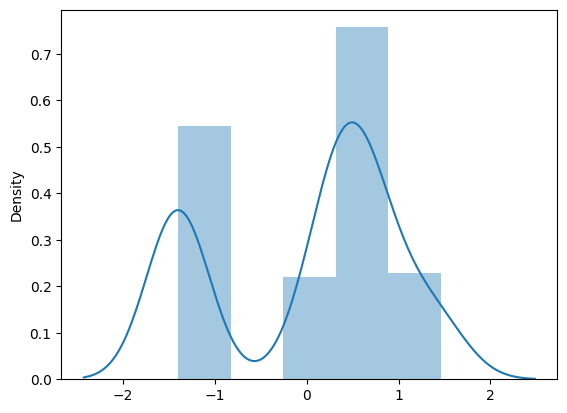

In [57]:
stdNdist((dataset)["salary"])

In [58]:
#Normal distribution convert into standard normal distribution µ=0 ,σ=1.

# 10) What is the probability Density Function of the salary range from 700000 to 900000?

In [59]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='red')
    pyplot.axvline(endrange,color='red')
    #generate a sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f,Standard Deviation=%.3f'%(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample probability for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}:{}".format(startrange,endrange,sum(probabilities)))
    return prob    

C:\Users\Vergeena\AppData\Local\Temp\ipykernel_29796\930061955.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Green')
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Mean=191125.581,Standard Deviation=136516.433
The area between range(700000,900000:9.656554457612362e-05


9.656554457612362e-05

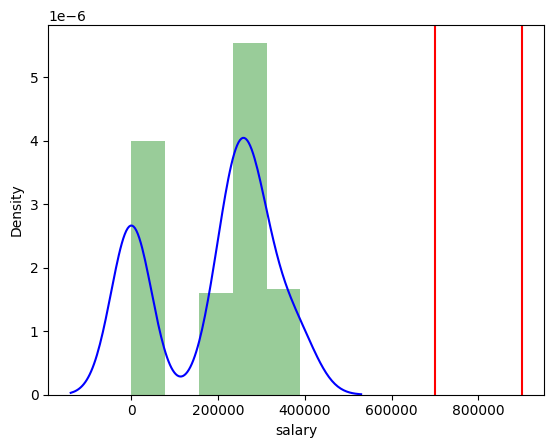

In [60]:
get_pdf_probability(dataset['salary'],700000,900000)

In [61]:
#The PDF ranges between 700000 and 900000:9.656554457612362e-05

# 11) Test the similarity between the degree_t (Sci&Tech)with respect to etest_p and mba_p at significance levelof 5%.(Make decisions using Hypothesis Testing).

In [62]:
from scipy.stats import ttest_ind
sci=dataset[dataset["degree_t"]=='Sci&Tech']["etest_p"]
sci1=dataset[dataset["degree_t"]=='Sci&Tech']["mba_p"]
ttest_ind(sci,sci1)

TtestResult(statistic=4.532000225151251, pvalue=1.4289217003775636e-05, df=116.0)

In [63]:
#It is paired T-Test(Same group but different condition)
#The Pvalue is 1.4289*10-5 is nearly 0(Con:pvalue<0.05 is reject null hypothesis),condition found is true.
#So,reject null hypothesis,accept Alternate hypothesis
#H0 -  has a similarity.
#H1 -  has a no similarity.
#The similarity between degree_t[Sci&Tech] with etest_P and mba_p is 0%

# 12) Which parameter is highly correlated with salary?


In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(x):
    #calculating vif
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF"]=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
    return vif

In [65]:
calc_vif(dataset[["ssc_p","hsc_p","etest_p","mba_p","salary"]])

,Variables,VIF
0,ssc_p,76.344395
1,hsc_p,60.348784
2,etest_p,32.100218
3,mba_p,88.374613
4,salary,4.988561


In [66]:
calc_vif(dataset[["ssc_p","salary"]])

,Variables,VIF
0,ssc_p,3.834952
1,salary,3.834952


In [67]:
calc_vif(dataset[["hsc_p","salary"]])

,Variables,VIF
0,hsc_p,3.573597
1,salary,3.573597


In [68]:
calc_vif(dataset[["etest_p","salary"]])

,Variables,VIF
0,etest_p,3.069467
1,salary,3.069467


In [69]:
calc_vif(dataset[["mba_p","salary"]])

,Variables,VIF
0,mba_p,3.023544
1,salary,3.023544


In [70]:
#All parameters are highly correlated- mba_p is highly correlated with salary
#After removing the highly correlated variable it gives no correlation.

# 13) plot any useful graph and explain it.

In [71]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

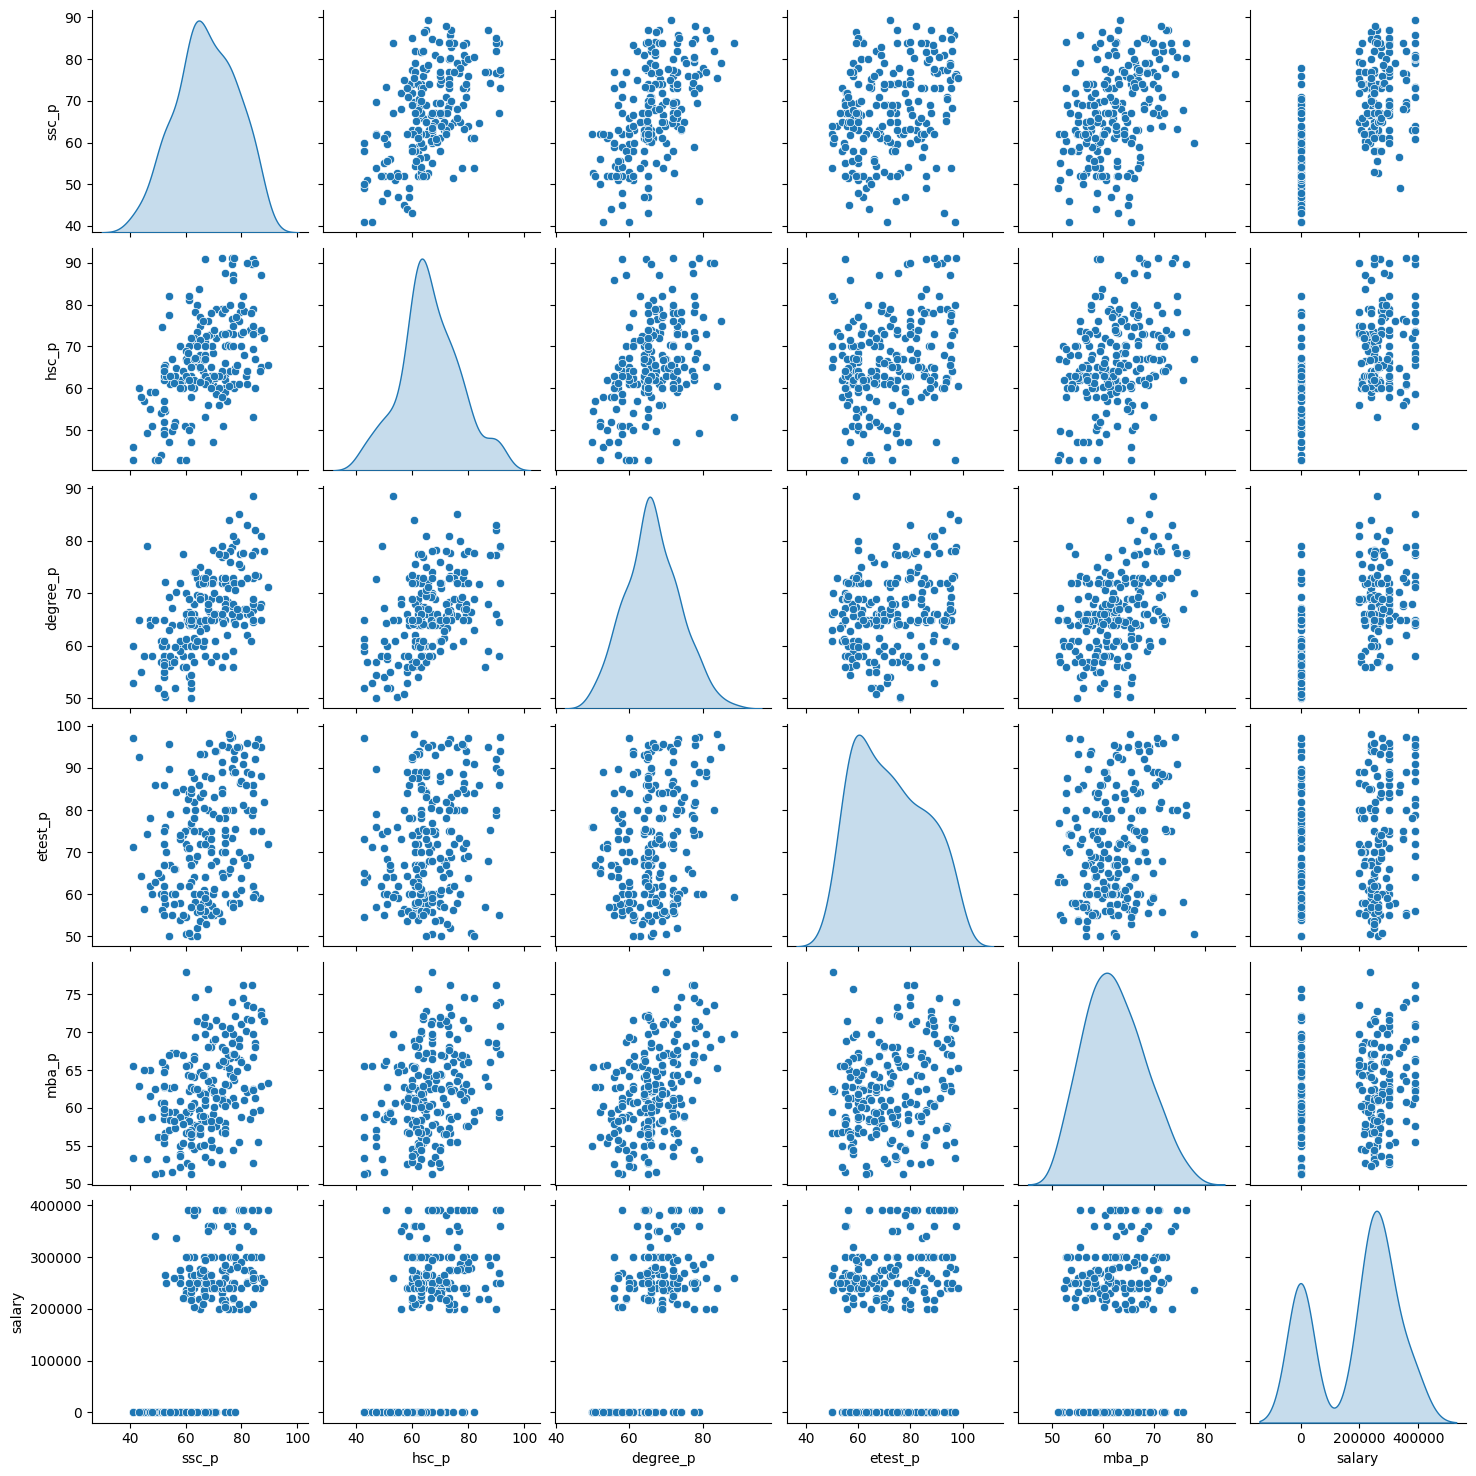

In [72]:
data=dataset
df=pd.DataFrame(dataset)
# Generate the scatter plot matrix
sns.pairplot(df, kind='scatter', diag_kind='kde')
plt.show()

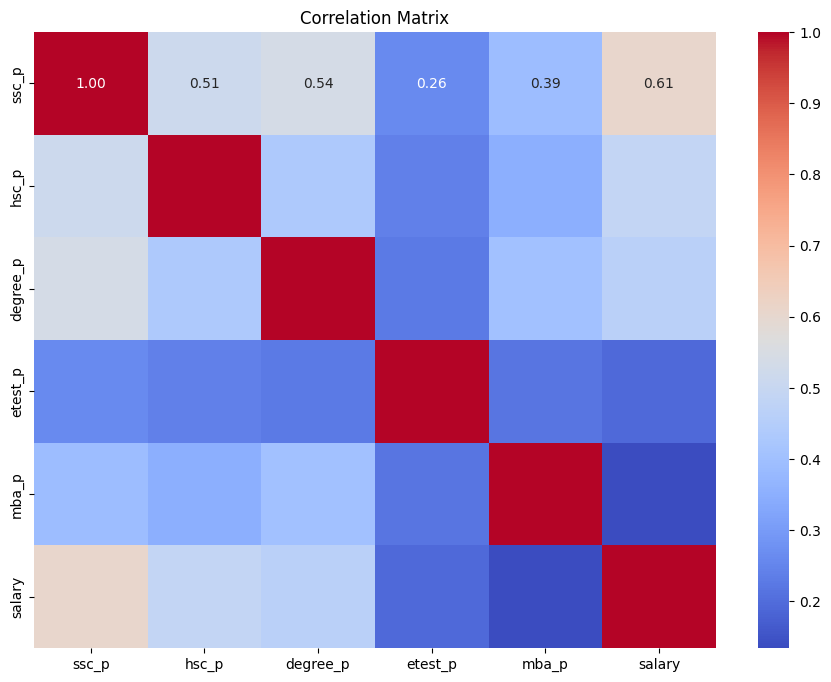

In [83]:
Correlation_Matrix=dataset.corr(numeric_only=True)
# Plotting the heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(Correlation_Matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()